### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск

1) Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.
2) Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
3) Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.



### Содержание
- [Подготовительная часть](Lesson_1_script.ipynb#Подготовительная-часть)
- [Практическое задание](Lesson_1_script.ipynb#Практическое-задание)

### Подготовительная часть

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

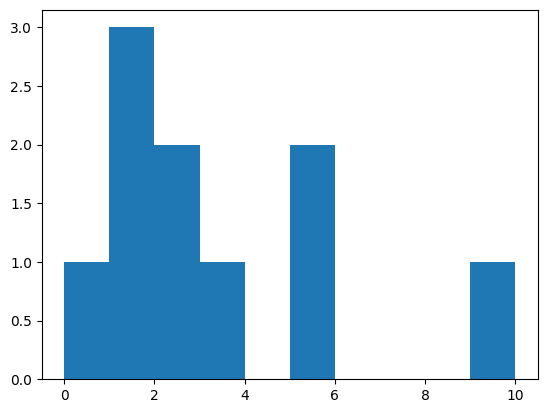

In [9]:
plt.hist(X[1])
plt.show()

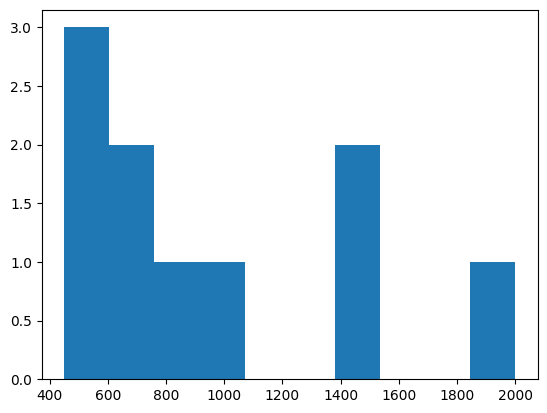

In [10]:
plt.hist(X[2])
plt.show()

In [11]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [12]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

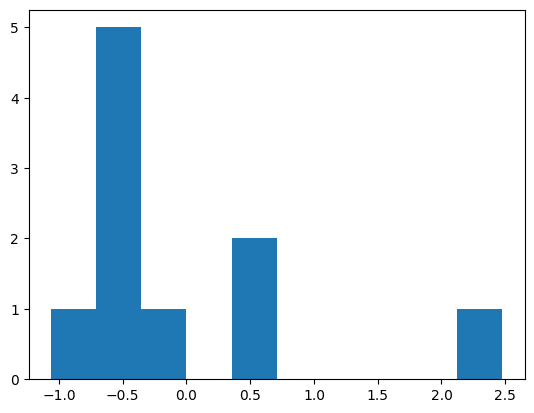

In [13]:
plt.hist(X_st[1])
plt.show()

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
X_st[2] = calc_std_fit(X[2])

In [16]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [18]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [19]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.09570803  4.81760065  2.96134616  4.52640151] 83.97746144494668
200 [55.51804609  5.3271216   2.29869415  4.7855572 ] 27.11702953766524
300 [56.36977371  5.62755423  1.77035578  5.03998706] 25.69171905083463
400 [56.48272945  5.81861151  1.35646986  5.28125409] 25.406005352420955
500 [56.49770959  5.94468765  1.02840238  5.49666199] 25.234476824969786
600 [56.49969625  6.03108982  0.76611513  5.68259398] 25.12285758967594
700 [56.49995972  6.09248815  0.55514501  5.83986465] 25.04934926196862
800 [56.49999466  6.13755295  0.38473511  5.97121466] 25.000703897915393
900 [56.49999929  6.1715374   0.24668675  6.08002405] 24.96844030552318
1000 [56.49999991  6.1977224   0.13463116  6.16968049] 24.947019858196455


array([56.49999991,  6.1977224 ,  0.13463116,  6.16968049])

In [20]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [21]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=4, alpha=1e-2)

500 [56.50783372  5.96610817  1.03529003  5.48252567] 13.112365796536249
1000 [56.51047876  6.20680658  0.13306392  6.17629435] 11.947868629246862
1500 [56.51056873  6.27558224 -0.18586923  6.43712574] 11.5252308866323
2000 [56.51060174  6.29941106 -0.30031341  6.531533  ] 11.373879670036624
2500 [56.51061365  6.30793647 -0.34146857  6.56552441] 11.319617730767728
3000 [56.51061794  6.31100099 -0.3562729   6.57775392] 11.300126334036925
3500 [56.51061948  6.31210329 -0.36159854  6.58215342] 11.2931184905515
4000 [56.51062004  6.31249982 -0.36351437  6.58373609] 11.29059802644397
4500 [56.51062024  6.31264247 -0.36420357  6.58430544] 11.289691387983723
5000 [56.51062031  6.31269378 -0.3644515   6.58451025] 11.289365244499795


array([56.51062031,  6.31269378, -0.3644515 ,  6.58451025])

L1 регуляризация

f(x, W) + (lambda_/2) * np.sum(np.abs(W))

L2 регуляризация

f(x, W) + (lambda_/2) * np.sum(W**2)

In [22]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [23]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)
W

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

### Практическое задание

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [24]:
lambdas = np.logspace(-10,0,100)
lambdas

array([1.00000000e-10, 1.26185688e-10, 1.59228279e-10, 2.00923300e-10,
       2.53536449e-10, 3.19926714e-10, 4.03701726e-10, 5.09413801e-10,
       6.42807312e-10, 8.11130831e-10, 1.02353102e-09, 1.29154967e-09,
       1.62975083e-09, 2.05651231e-09, 2.59502421e-09, 3.27454916e-09,
       4.13201240e-09, 5.21400829e-09, 6.57933225e-09, 8.30217568e-09,
       1.04761575e-08, 1.32194115e-08, 1.66810054e-08, 2.10490414e-08,
       2.65608778e-08, 3.35160265e-08, 4.22924287e-08, 5.33669923e-08,
       6.73415066e-08, 8.49753436e-08, 1.07226722e-07, 1.35304777e-07,
       1.70735265e-07, 2.15443469e-07, 2.71858824e-07, 3.43046929e-07,
       4.32876128e-07, 5.46227722e-07, 6.89261210e-07, 8.69749003e-07,
       1.09749877e-06, 1.38488637e-06, 1.74752840e-06, 2.20513074e-06,
       2.78255940e-06, 3.51119173e-06, 4.43062146e-06, 5.59081018e-06,
       7.05480231e-06, 8.90215085e-06, 1.12332403e-05, 1.41747416e-05,
       1.78864953e-05, 2.25701972e-05, 2.84803587e-05, 3.59381366e-05,
      

In [25]:
W_results = []
for l in lambdas:
    W_results.append(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=l))

W_results = np.array(W_results)


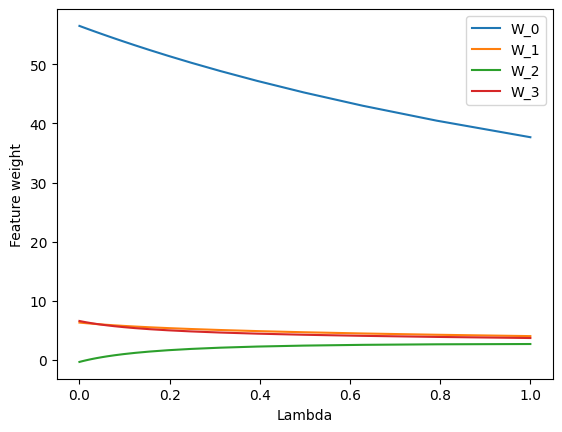

In [26]:
legends = []
for i in range(len(W_results[0])):
    legends.append(f'W_{i}')
    plt.plot(lambdas, W_results[:,i])

plt.legend(legends)
plt.xlabel('Lambda')
plt.ylabel('Feature weight')
plt.show()

---

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно, поочередно применять оба этих метода. но вот какой в этом смысл другой вопрос

---

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [43]:
def eval_model_reg_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        #err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.abs(W))
    return W

In [44]:
W = eval_model_reg_l1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)
W

array([56.49995   ,  6.30286274, -0.35565596,  6.57092884])

In [45]:
W_results = []
for l in lambdas:
    W_results.append(eval_model_reg_l1(X_st, y, iterations=5000, alpha=1e-2, lambda_=l))

W_results = np.array(W_results)


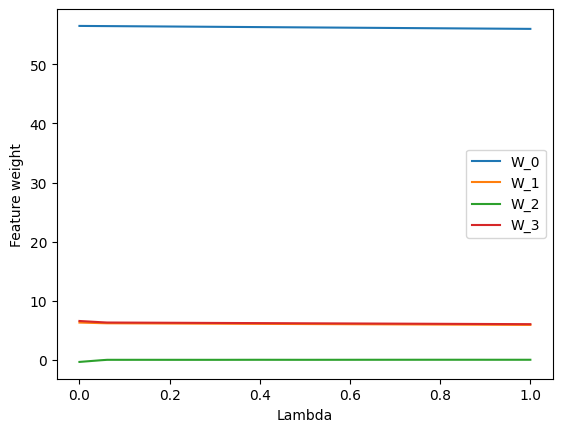

In [46]:
legends = []
for i in range(len(W_results[0])):
    legends.append(f'W_{i}')
    plt.plot(lambdas, W_results[:,i])

plt.legend(legends)
plt.xlabel('Lambda')
plt.ylabel('Feature weight')
plt.show()